<a href="https://colab.research.google.com/github/vee234o/AI-Now-Churn-Project/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#To import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
#Load the csv data as a dataframe
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling Dataset.csv')

In [39]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
#To view the the categorical and numericalfeatures separately
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(exclude='object').columns
print(cat_col)
print(num_col)

Index(['Surname', 'Geography', 'Gender'], dtype='object')
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')


In [43]:
#To view the number of unique values
df[cat_col].nunique()

,0
Surname,2932
Geography,3
Gender,2


In [44]:
df1 = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [45]:
#To view missing values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [46]:
#Shows statistical summary for features that are numeric
df1.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


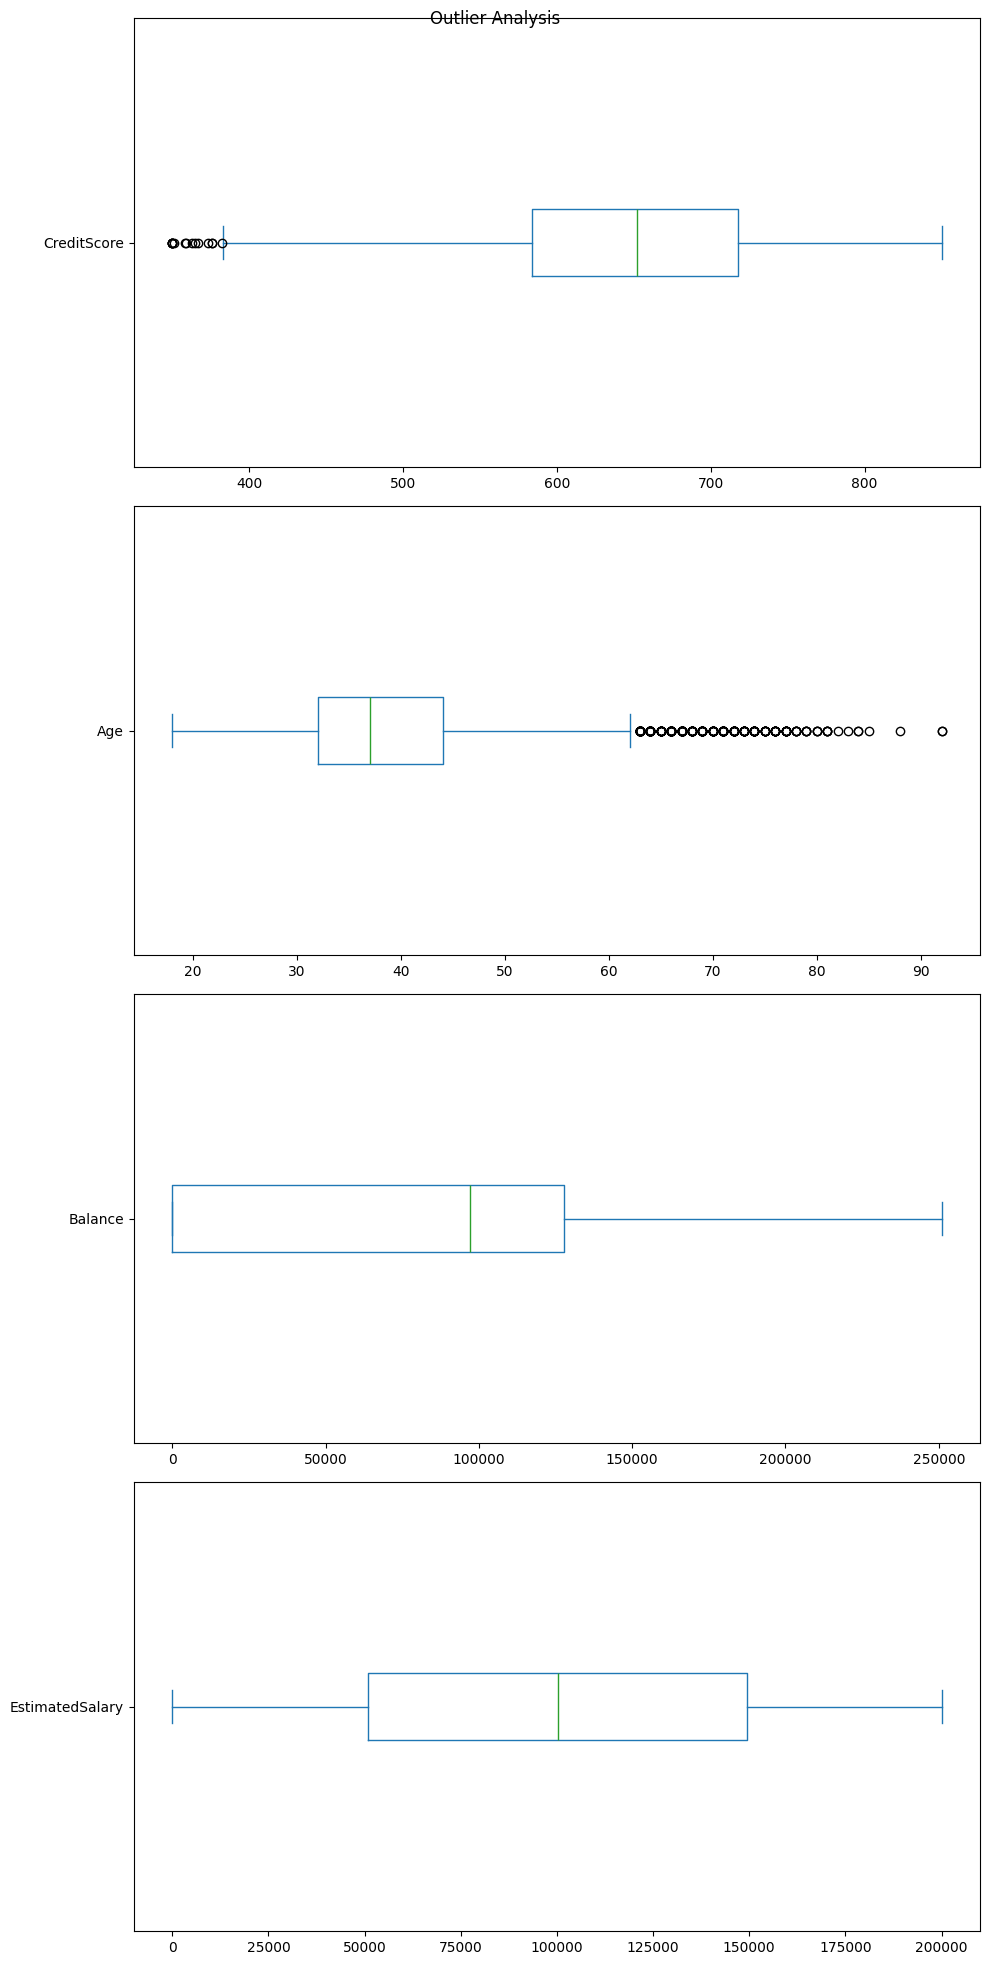

In [47]:
# To check all the outliers
df1[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].plot(
    kind='box',
    subplots=True,
    layout=(4, 1),
    figsize=(10, 20),
    vert = False,
    sharex=False,
    title='Outlier Analysis'
)

plt.tight_layout()
plt.show()

In [48]:
# 1. Encode Gender (Female -> 0, Male -> 1)
if df1['Gender'].dtype == 'object':
    df1['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

# 2. Encode Geography (Create the switches)
df1 = pd.get_dummies(df1, columns=['Geography'], drop_first=True)

/tmp/ipython-input-2839789803.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


In [49]:
corr = df1.corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482
Churn,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667


<Axes: >

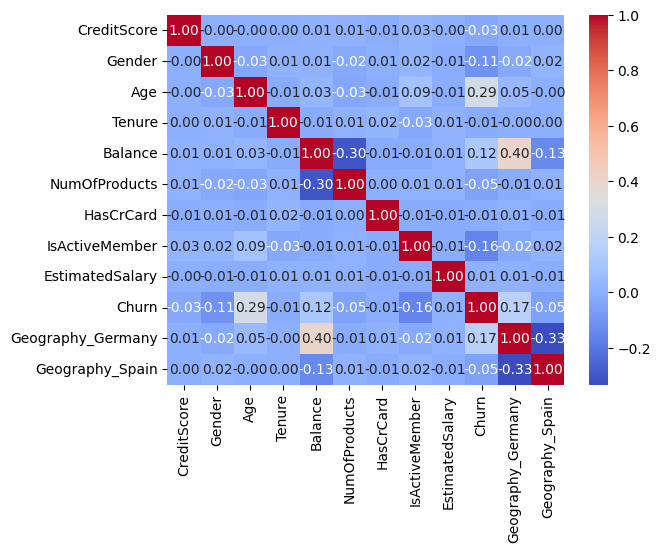

In [50]:
sns.heatmap(corr, annot=True, fmt = '.2f', cmap ='coolwarm')

In [51]:
print(corr['Churn'].sort_values(ascending = False))

Churn                1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender              -0.106512
IsActiveMember      -0.156128
Name: Churn, dtype: float64


In [52]:
#drop the irrelevant columns(columns that their correlation is approximately 0.01) from your dataframe
irr_cols = ['EstimatedSalary', 'HasCrCard', 'Tenure', 'CreditScore']

df1.drop(columns= irr_cols, inplace=True)

df1.head()

,Gender,Age,Balance,NumOfProducts,IsActiveMember,Churn,Geography_Germany,Geography_Spain
0,0,42,0.00,1,1,1,False,False
1,0,41,83807.86,1,1,0,False,True
2,0,42,159660.80,3,0,1,False,False
3,0,39,0.00,2,0,0,False,False
4,0,43,125510.82,1,1,0,False,True


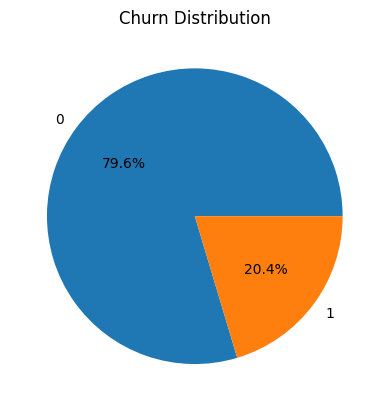

In [53]:
plt.pie(df1['Churn'].value_counts(), labels=df1['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

In [54]:
x = df1.drop(columns=['Churn'])
y = df1['Churn']

In [55]:
#To split the data set into the training and testing set by 80 and 20%
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#To scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
# Check if it worked
print("Training Data Shape:", X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)
print("First row of scaled training data:\n", X_train_scaled[0])

Training Data Shape: (8000, 7)
Testing Data Shape: (2000, 7)
First row of scaled training data:
 [ 0.91324755 -0.6557859  -1.21847056  0.80843615  0.97481699 -0.57946723
 -0.57638802]


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42)

# 2. Train the Model using the fit method
model.fit(X_train_scaled, y_train)

# predict y values
y_pred = model.predict(X_test_scaled)



In [58]:
# 4. See the Score (Accuracy)
# We compare its Guesses (y_pred) vs. the Real Answers (y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 81.00%


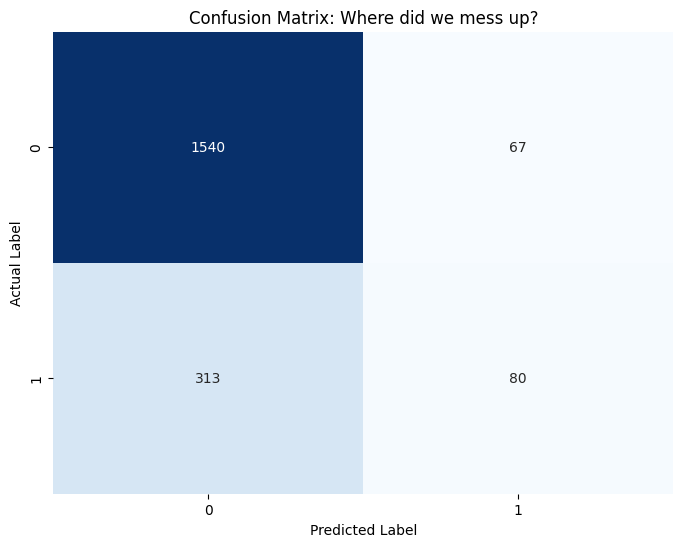

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Calculate the Matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Visualize it nicely
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix: Where did we mess up?')
plt.show()

In [61]:
model_balanced = LogisticRegression(random_state=42, class_weight='balanced')

# 2. Train the Model using the fit method
model_balanced.fit(X_train_scaled, y_train)

# predict y values
y_pred = model_balanced.predict(X_test_scaled)

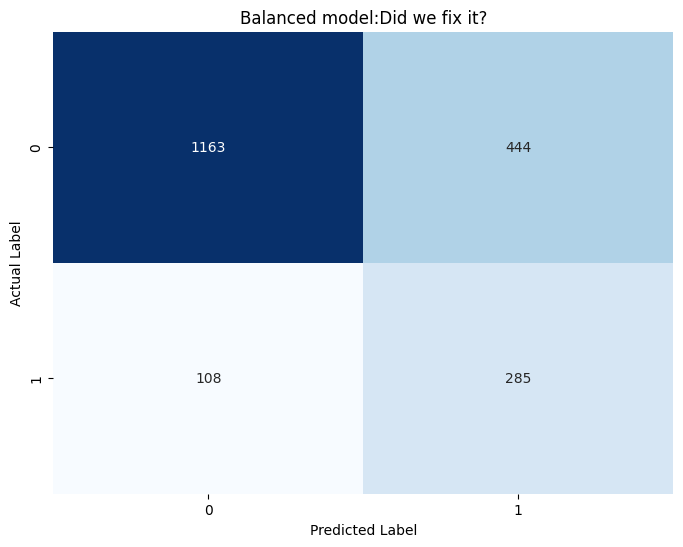

In [62]:
cm_balanced = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_balanced, annot =True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Balanced model:Did we fix it?')
plt.show()

Random Forest Accuracy: 84.15%


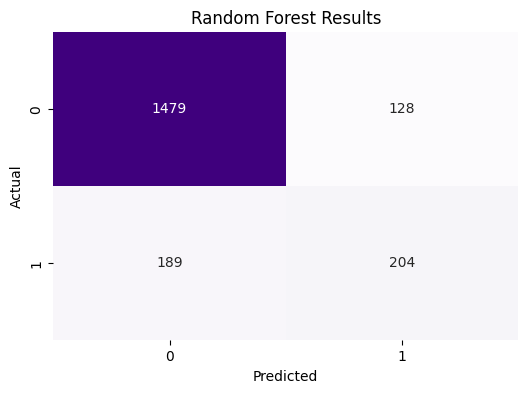

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Initialize the Random Forest
# n_estimators=100 means we are building 100 different trees
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# 2. Train the Forest
# We can use the same scaled data (X_train_scaled)
rf_model.fit(X_train_scaled, y_train)

# 3. Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# 4. Check the New Accuracy
acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc*100:.2f}%")

# 5. Visualize the New Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Random Forest Results')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

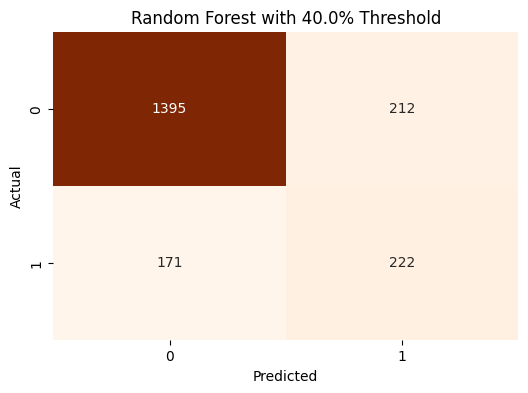

In [64]:
# 1. Get the probability votes (e.g., "0.45" means 45% of trees said Churn)
y_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# 2. Lower the threshold to 40% (Default is 0.50)
# If >40% of trees say "Churn", we mark them as Churn (1)
new_threshold = 0.40
y_pred_adjusted = (y_probs >= new_threshold).astype(int)

# 3. Check the new "Adjusted" Confusion Matrix
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title(f'Random Forest with {new_threshold*100}% Threshold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipython-input-1182623353.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


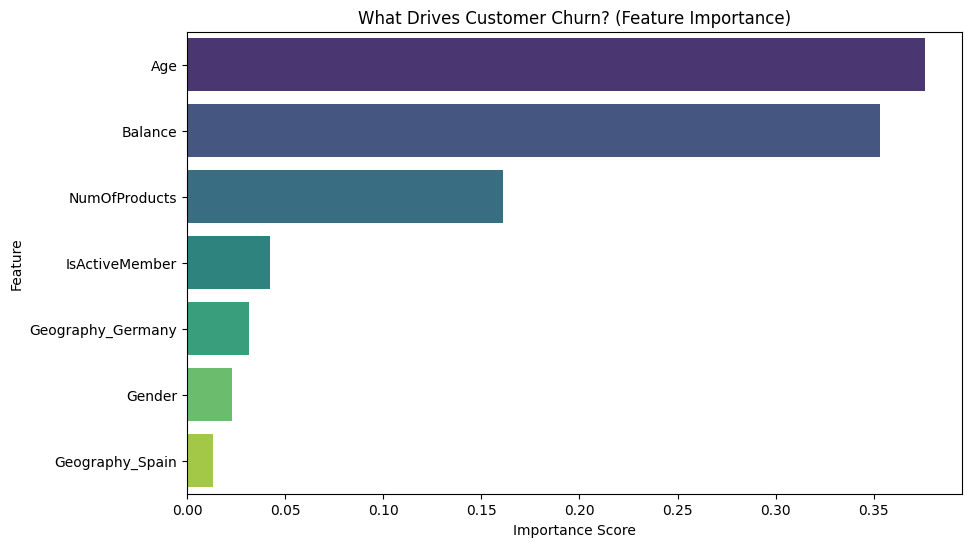

In [66]:
# Get Feature Importances from the Random Forest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get the numbers
importances = rf_model.feature_importances_

# 2. Match them to column names
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 3. Sort them (Highest importance on top)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Plot it
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('What Drives Customer Churn? (Feature Importance)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()